# Student Performance Classification Lab
This notebook will build and evaluate classification models (Logistic Regression, k-NN, and Decision Trees) using a student performance dataset found on Kaggle.

In [1]:
##### MGT 665 Lab 2
##### Andrey Castel
##### Dr. Itauma

In [2]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Retrieve Dataset

In [3]:
# Run this cell to install the kagglehub package and download the latest version of the dataset.
# The dataset will be downloaded to the current working directory.
import kagglehub
# Download the dataset from Kaggle and store the path to the dataset files in a variable.
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
print("Path to dataset files:", path)

c:\Users\Andrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Andrey\.cache\kagglehub\datasets\rabieelkharoua\students-performance-dataset\versions\2


## Preprocessing
We load the dataset and preprocess it by removing irrelevant columns and scaling numeric features.

In [4]:
# Load dataset
data = pd.read_csv(f"{path}/Student_performance_data _.csv")

# Drop irrelevant columns and separate features (X) and target (y)
X = data.drop(columns=['StudentID', 'GPA', 'GradeClass'])
y = data['GradeClass']

# Scale numeric features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify that the data is loaded and processed correctly
print("Data loaded successfully")
print("First few rows of the dataset:")
print(data.head())


Data loaded successfully
First few rows of the dataset:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0 

## Exploratory Data Analysis
Visualizing distributions and correlations among features.

C:\Users\Andrey\AppData\Local\Temp\ipykernel_6968\1255708719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=data, palette='Set2')


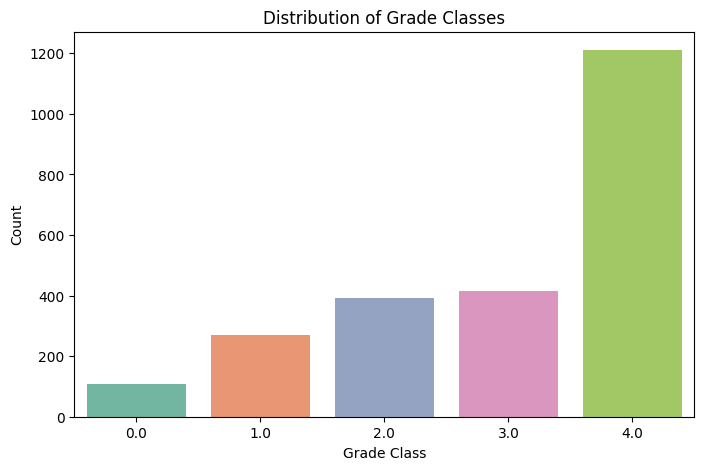

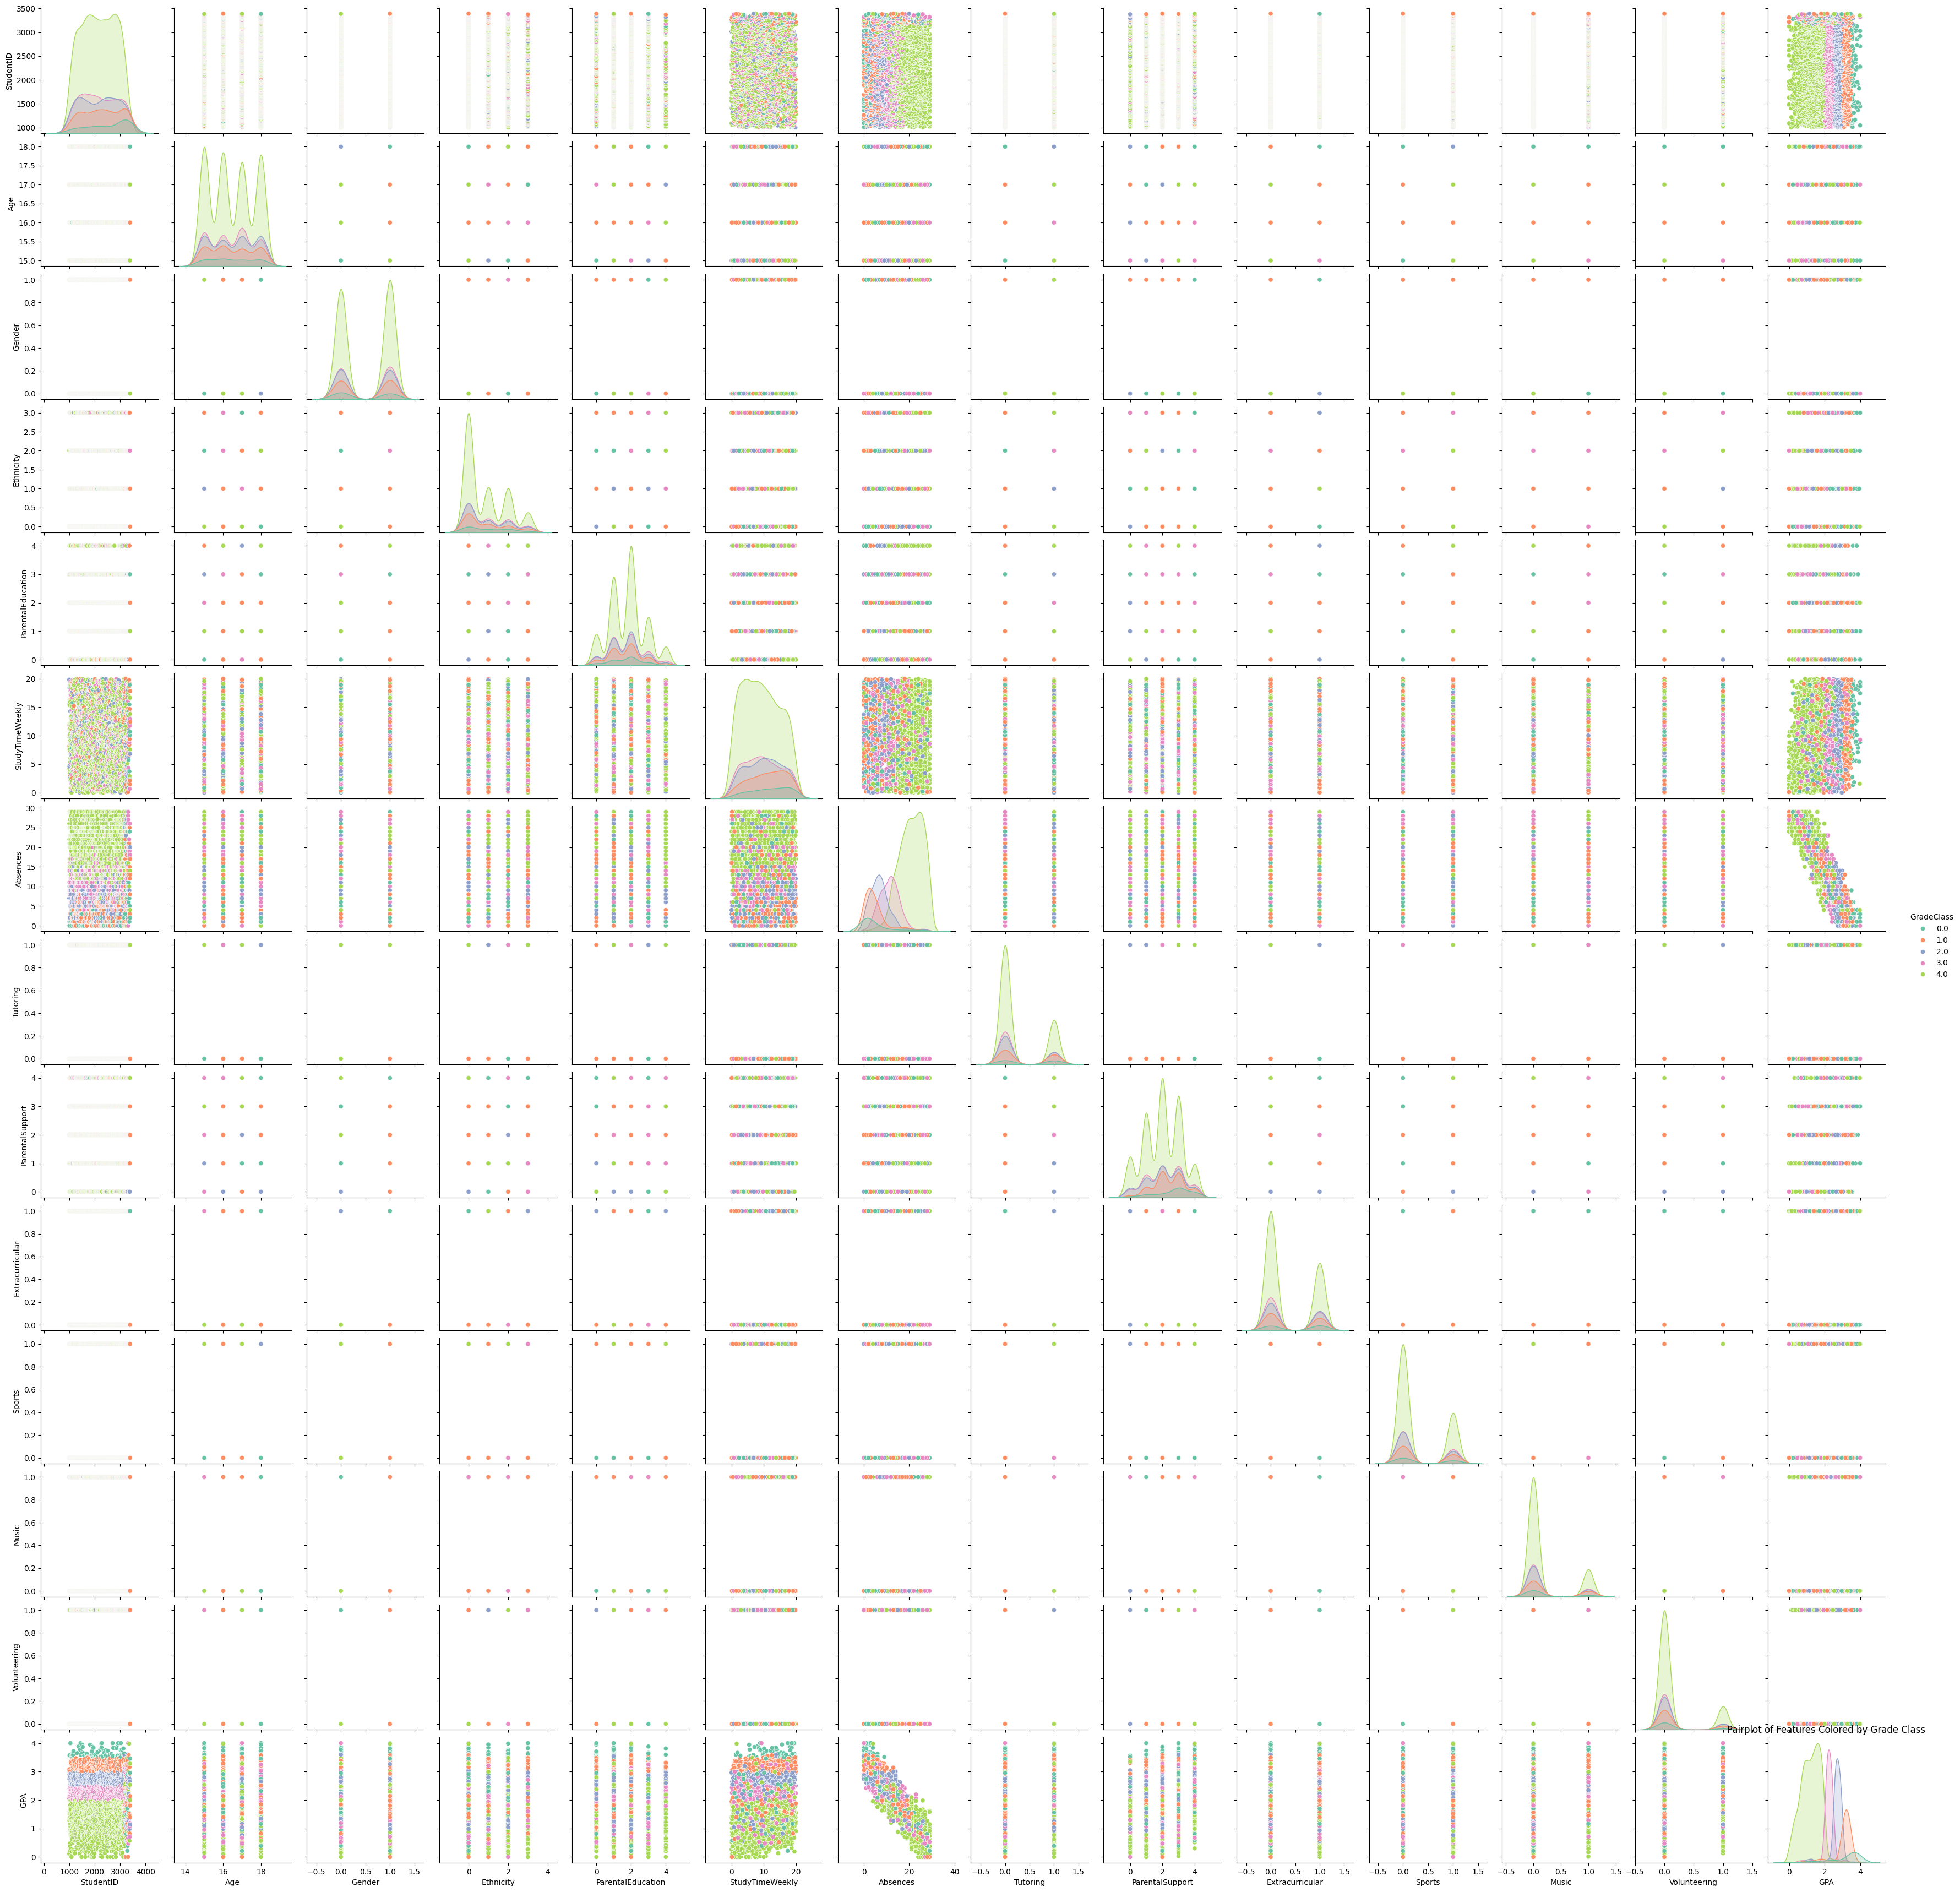

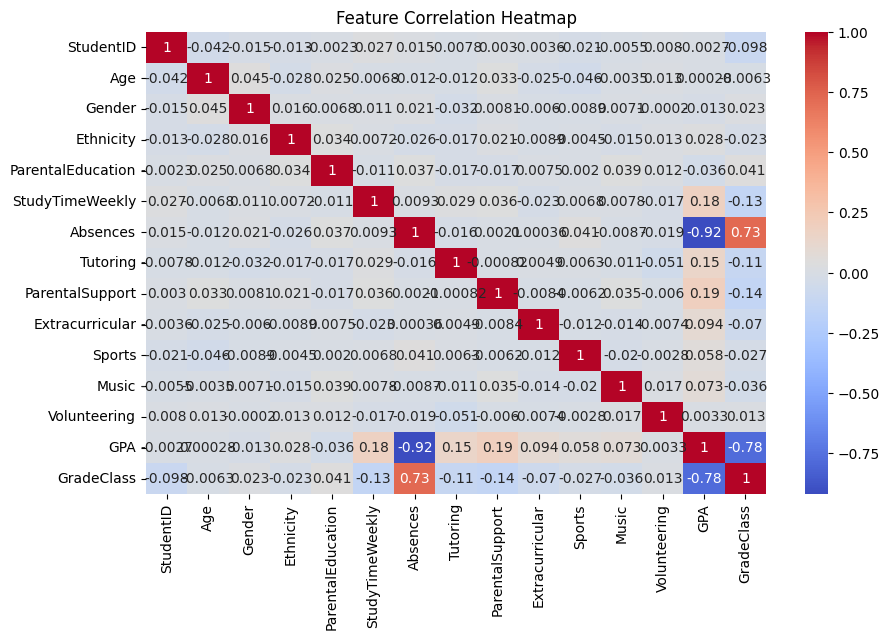

In [5]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='GradeClass', data=data, palette='Set2')
plt.title("Distribution of Grade Classes")  
plt.xlabel("Grade Class")
plt.ylabel("Count")
plt.show()

# Create a pairplot to visualize the relationships between features
sns.pairplot(data, hue='GradeClass', palette='Set2')
plt.title("Pairplot of Features Colored by Grade Class")
plt.show()


# Plot a heatmap to visualize the correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Model Development and Evaluation
Train Logistic Regression, k-NN, and Decision Tree classifiers and compare their performance using classification metrics.

### Logistic Regression Model

In [6]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [7]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.39      0.39      0.39        49
         2.0       0.53      0.58      0.55        85
         3.0       0.53      0.36      0.43        86
         4.0       0.84      0.96      0.90       237

    accuracy                           0.68       479
   macro avg       0.46      0.46      0.45       479
weighted avg       0.65      0.68      0.66       479



### k-Nearest Neighbors (k-NN) Model

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [9]:
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Classification Report:
              precision    recall  f1-score   support

         0.0       0.14      0.05      0.07        22
         1.0       0.23      0.22      0.23        49
         2.0       0.35      0.41      0.38        85
         3.0       0.33      0.29      0.31        86
         4.0       0.80      0.85      0.82       237

    accuracy                           0.57       479
   macro avg       0.37      0.36      0.36       479
weighted avg       0.55      0.57      0.56       479



### Decision Tree Model

In [10]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [11]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.18      0.21        22
         1.0       0.37      0.51      0.43        49
         2.0       0.43      0.42      0.43        85
         3.0       0.46      0.41      0.43        86
         4.0       0.83      0.83      0.83       237

    accuracy                           0.62       479
   macro avg       0.47      0.47      0.47       479
weighted avg       0.62      0.62      0.62       479



## Confusion Matrices
The following plots display the confusion matrices for each classification model:

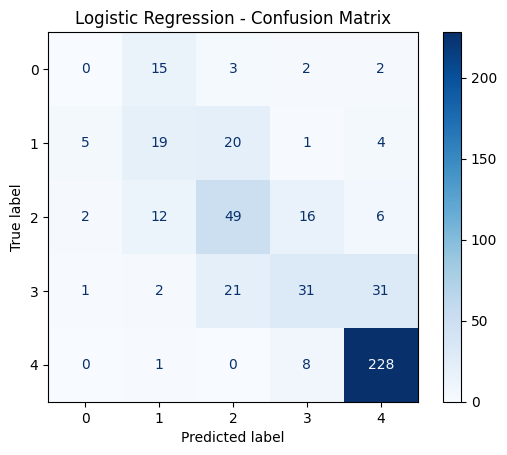

In [12]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

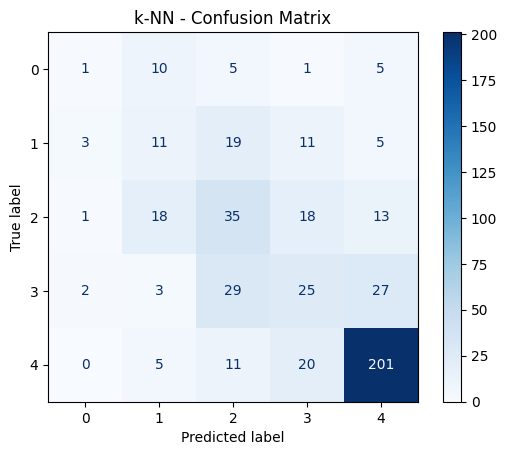

In [13]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='Blues')
plt.title("k-NN - Confusion Matrix")
plt.show()

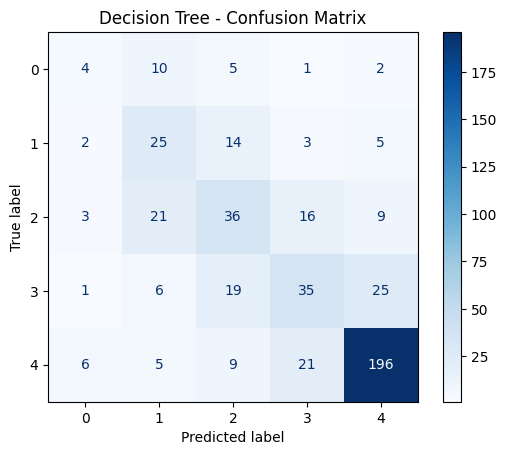

In [14]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

## Discussion
- **Logistic Regression** had the highest accuracy among the models.
- **k-NN** showed slightly lower performance and might benefit from further hyperparameter tuning.
- **Decision Tree** offers interpretability and decent performance but may overfit with deeper trees.
- Future work could explore Random Forests or SVM for better generalization.

## Summary of Model Strengths and Weaknesses

Logistic Regression:
Logistic Regression gave the best results out of the three models. It works well when the relationship between the features (like age or study time) and the outcome (like grade level) is mostly direct relationships. It’s also fast and easy to understand and implement, which makes it a good starting point for many problems. However, as more variables are introduced the regression will become of a high order and need more intricate and detailed models. 

k-Nearest Neighbors (k-NN):
k-NN didn’t perform as well on this dataset. While it’s easy to understand and simple to set up, its results can change a lot depending on how many neighbors you choose (the “k” value). It also relies heavily on how the data is scaled and can slow down with large amounts of data. With more tuning or changes, its performance could improve, but not in this instance.

Decision Tree:
The Decision Tree model gave average results. It’s good at handling both numbers and categories and can catch more complicated patterns that other models might miss. Also, it's easier to explain how it made its decisions. But it has tendency for to lean towards overfitting. It might work better with some adjustments like pruning or using Random Forest.